<a href="https://colab.research.google.com/github/marcusRB/urv-biomedical-imaging/blob/master/PRACTICES/PRA2/MBDS_P1_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1. MRI - Visualization & Segmentation of brain images

In this practical session ...

Dowload the data from the virtual campus and store it in your computer. Then, upload the data into the Colab session using the left menu.  

Remember to create a **copy** of this file in your drive and rename it to be able to edit.  

NOTES:
* If you need to review some Python basics, you can use [this tutorial](https://colab.research.google.com/drive/1lrI9l-zQf28swxkJ9dI1iBTNMlVVXqCj?usp=sharing).
* If you want to learn more about [nilearn](https://https://nilearn.github.io/stable/index.html#) and [nibabel](https://nipy.org/nibabel/), check the online documentation.  
* At the end of the session, download the .ipynb file and submit it to the Virtual Campus. Remember to write your name(s) in the filename!

In [1]:
# Check and install the toolboxes
try:
    import nibabel
except ImportError:
    # if not, install it using pip
    !pip install nibabel

# And nilearn
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

# And nilearn
try:
    import nipype
except ImportError:
    # if not, install it using pip
    !pip install nipype

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.9/425.9 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.0/569.0 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00


In [2]:
# https://github.com/marcusRB/urv-biomedical-imaging/blob/master/PRACTICES/PRA2/data_MHEDAS_MI_P1.zip
!wget --no-check-certificate https://github.com/marcusRB/urv-biomedical-imaging/raw/master/PRACTICES/PRA2/data_MHEDAS_MI_P1.zip -O /content/data_MHEDAS_MI_P1.zip

--2025-11-17 19:00:51--  https://github.com/marcusRB/urv-biomedical-imaging/raw/master/PRACTICES/PRA2/data_MHEDAS_MI_P1.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marcusRB/urv-biomedical-imaging/master/PRACTICES/PRA2/data_MHEDAS_MI_P1.zip [following]
--2025-11-17 19:00:51--  https://raw.githubusercontent.com/marcusRB/urv-biomedical-imaging/master/PRACTICES/PRA2/data_MHEDAS_MI_P1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27188650 (26M) [application/zip]
Saving to: ‘/content/data_MHEDAS_MI_P1.zip’

/content/data_MHEDA 100%[===================>]  25.93M   159MB/s    in 0.2s    



In [3]:
!unzip /content/data_MHEDAS_MI_P1.zip

Archive:  /content/data_MHEDAS_MI_P1.zip
   creating: data_MHEDAS_MI_P1/
  inflating: __MACOSX/._data_MHEDAS_MI_P1  
  inflating: data_MHEDAS_MI_P1/example_T1_brain_restore.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T1_brain_restore.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T1_brain_pve_1.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T1_brain_pve_1.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T1_brain.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T1_brain.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T1_brain_pveseg.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T1_brain_pveseg.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T2w.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T2w.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T1_brain_seg.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/._example_T1_brain_seg.nii.gz  
  inflating: data_MHEDAS_MI_P1/example_T1w.nii.gz  
  inflating: __MACOSX/data_MHEDAS_MI_P1/.

## 1. Interacting with images

We will see some tools for visualization of MR images (here, brain scans)

In [4]:
import nibabel as nib
import nilearn
from nilearn import plotting

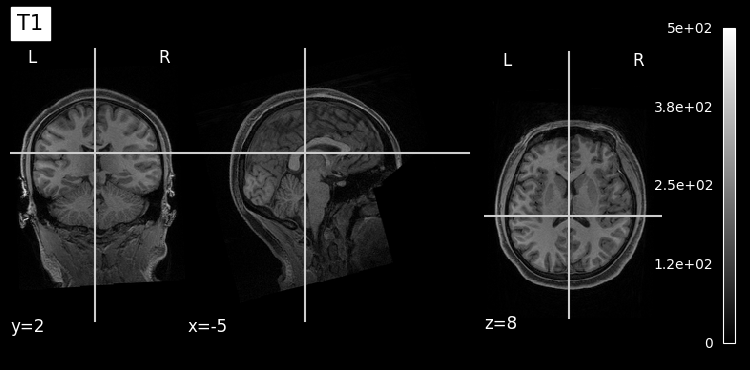

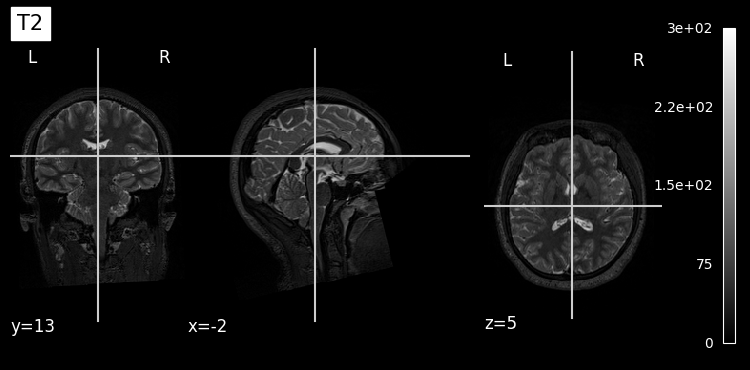

In [5]:
T1_filename = '/content/data_MHEDAS_MI_P1/example_T1w.nii.gz' # The name of the image file that we want to plot
T2_filename = '/content/data_MHEDAS_MI_P1/example_T2w.nii.gz'
T1_img = nib.load (T1_filename)
T2_img = nib.load (T2_filename)

# need to grab data arrays
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

# plot
plotting.plot_anat(T1_filename, title="T1", vmax=500)
plotting.plot_anat(T2_filename, title="T2", vmax=300)

**Exercise:** Look at the images and descibe the visual differences between the two types of images (2-5 lines).

*Write your answer here*

T1w-img and T2w-img show different tissue contrasts due to their sensitivity to different relaxation times.

In T1w images, cerebrospinal fluid (CSF) appears dark/hypointense, gray matter appears gray, and white matter appears bright/hyperintense.

In the other hand, T2w images show the opposite pattern: CSF appears bright/hyperintense, while white matter appears darker than gray matter.

These complementary contrasts make each sequence useful for identifying different anatomical structures and pathological conditions, as they provide different types of tissue information from the same brain anatomy.

##2. Artifact correction and clean-up



*   Correcting artifacts and cleaning the image is crucial for the success of **automated processing methods** (i.e., segmentation, registration, ...)
*   A typical issue with MRI scans is caused by **spatial inhomogeneties** of the magnetic field, namely **bias field**, a smooth signal intensity variation within tissue of the same physical properties.
*   Note that **bias field** is modeled as a multiplicative factor, whereas ***noise*** is assumed to be an additive and spatially independent (Gaussian) factor.


In the fibure below you have an example of a T1w image and its bias.







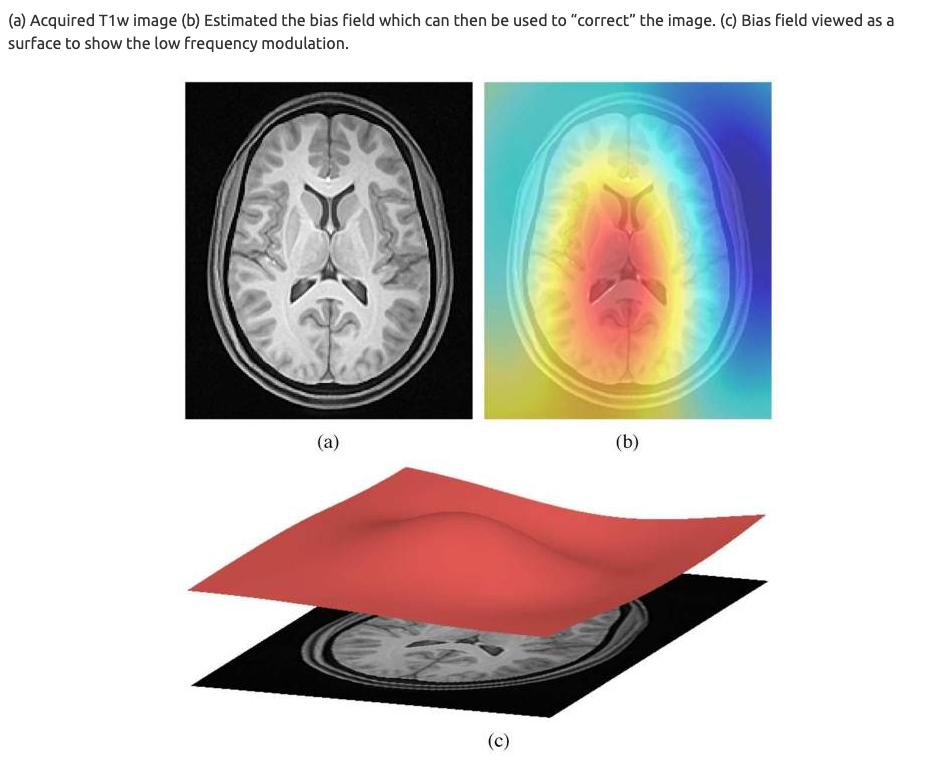

###Bias field correction
There are many automated pipelines that can be used to perform this corrections (some are integrated within longer pipelines such as FreeSurfer, FSL and SPM).

In this example, we will *simulate* the use of the ANTs software. It can be run independently (see [documentation](https://http://stnava.github.io/ANTs/)) or within the nipype package.



```
from nipype.interfaces.ants import N4BiasFieldCorrection

n4 = N4BiasFieldCorrection()
n4.inputs.dimension = 3
n4.inputs.input_image = 'example_T1w.nii.gz'
n4.inputs.bspline_fitting_distance = 300
n4.inputs.shrink_factor = 3
n4.inputs.n_iterations = [50,50,30,20]
n4.cmdline

```


The above code would give an instruction that should be run from command line (note that this could be executed from a terminal, YOU DON'T HAVE TO RUN IT FOR THIS PRACTICAL SESSION).

The ***bias field correction*** produces changes in the histogram and can have a strong impact on a subsequant segmentation task.  

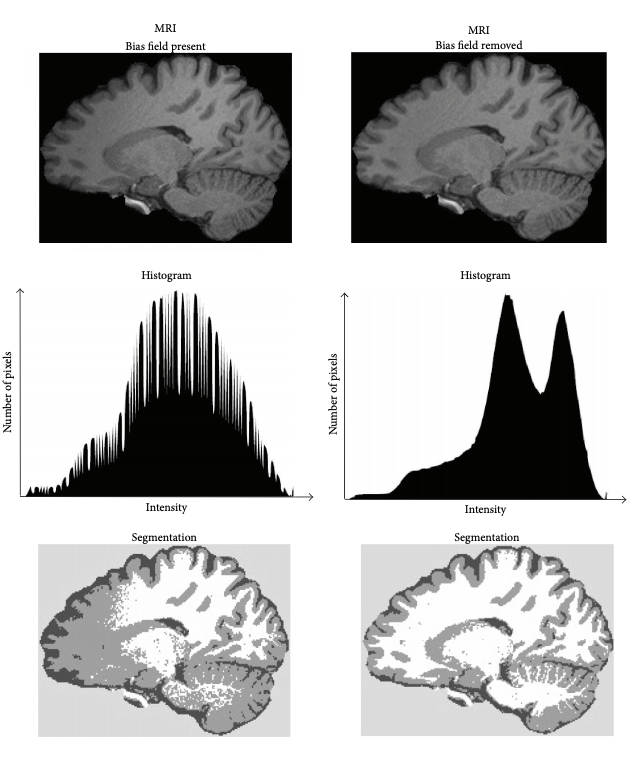

###Visualizing images before and after correction
We'll use nibabel/nilearn tools to visualize some of the example images.  

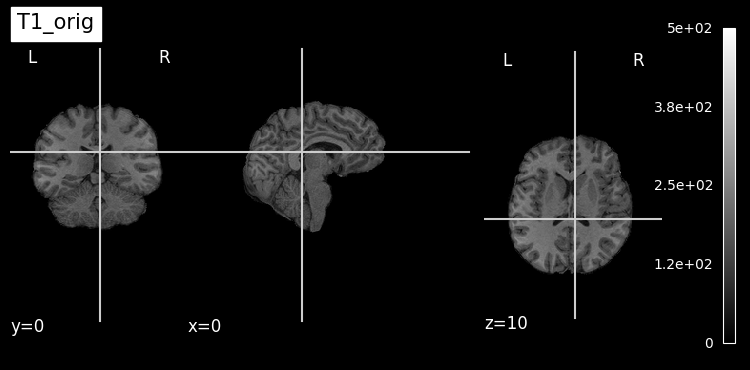

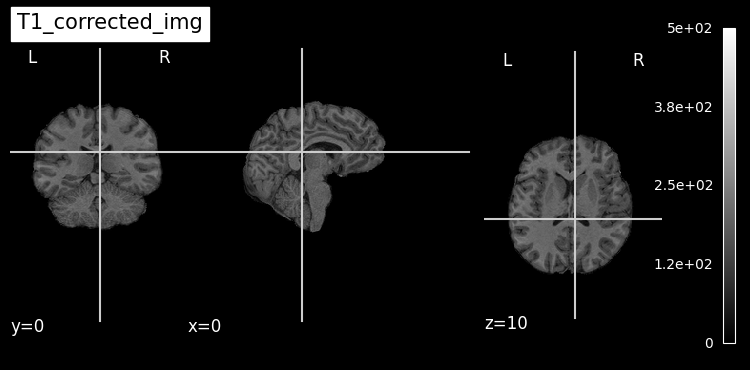

In [6]:
import nibabel as nib
from nilearn import plotting
T1_orig = '/content/data_MHEDAS_MI_P1/example_T1_brain.nii.gz'
T1_corrected = '/content/data_MHEDAS_MI_P1/example_T1_brain_restore.nii.gz' # this is the bias corrected image :)
T1_img_orig = nib.load(T1_orig)
T1_img_corrected = nib.load(T1_corrected)

# plot
cut_coords = (0,0,10) # try changing these coordinates
plotting.plot_anat(T1_orig, title="T1_orig", cut_coords=cut_coords, vmax=500)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", cut_coords=cut_coords, vmax=500)

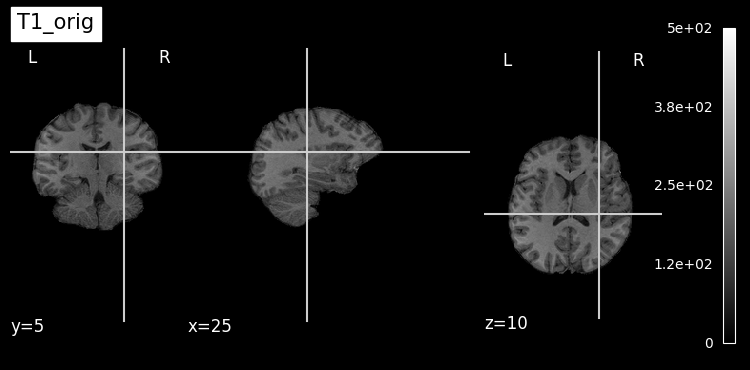

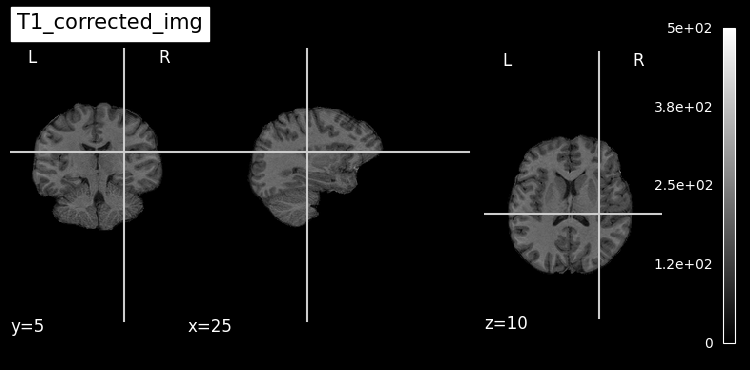

In [19]:
cut_coords = (25,5,10)
plotting.plot_anat(T1_orig, title="T1_orig", cut_coords=cut_coords, vmax=500)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", cut_coords=cut_coords, vmax=500)

**Exercise:** Describe the differences that you see between the images above? Try changing the plotting arguments to make them more visible.    


Viewing with cut_coords: (0, 0, 10)

Viewing with cut_coords: (0, 0, 0)

Viewing with cut_coords: (0, 10, 10)


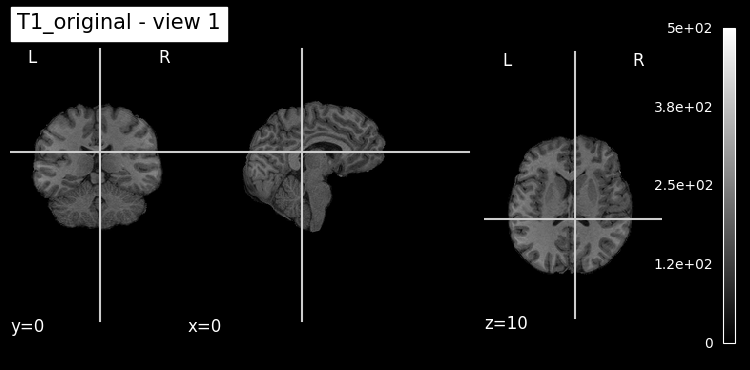

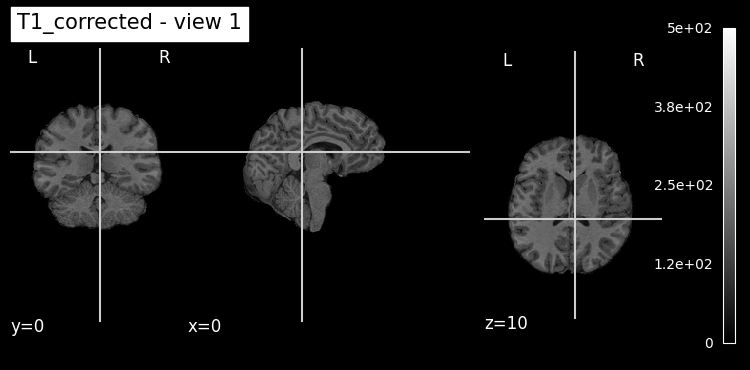

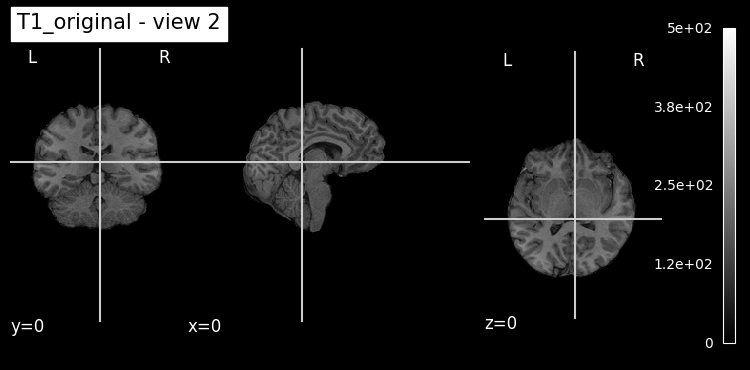

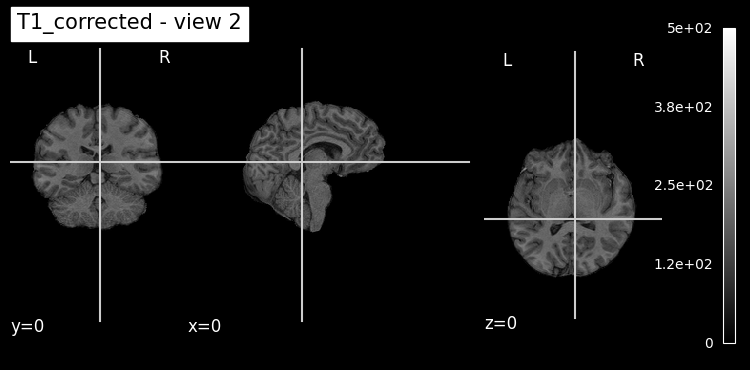

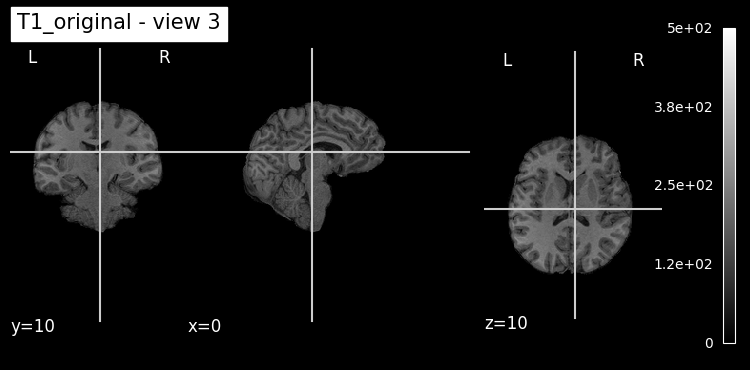

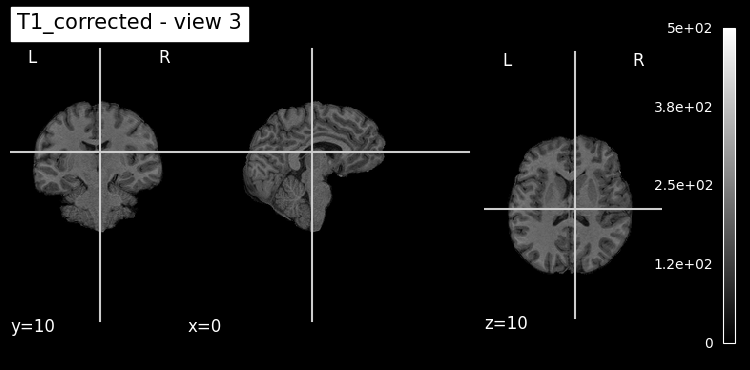

In [20]:
#place your code here
cut_coords_options = [(0, 0, 10), (0, 0, 0), (0, 10, 10)]

for i, cut_coords in enumerate(cut_coords_options):
    print(f"\nViewing with cut_coords: {cut_coords}")
    plotting.plot_anat(T1_orig, title=f"T1_original - view {i+1}",
                      cut_coords=cut_coords, vmax=500, display_mode='ortho')
    plotting.plot_anat(T1_corrected, title=f"T1_corrected - view {i+1}",
                      cut_coords=cut_coords, vmax=500, display_mode='ortho')

**Exercise:** Plot the bias field image (Find it in your data folder!)

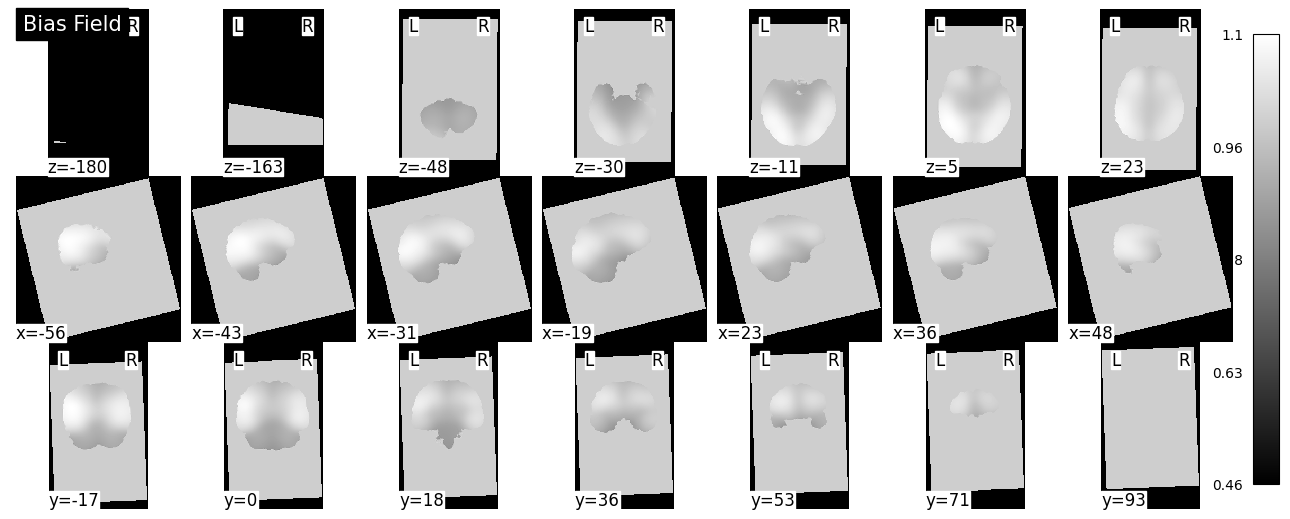

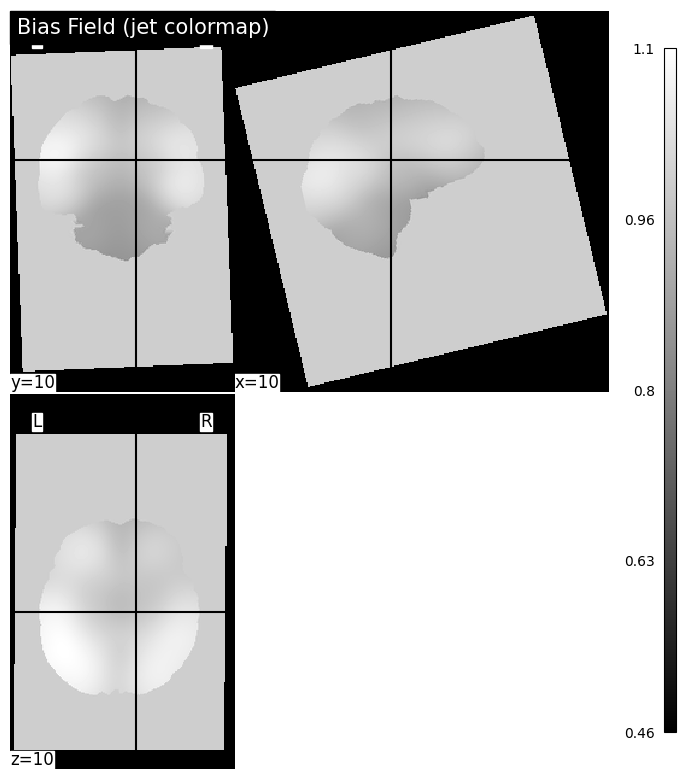

In [17]:
#place your code here
T1_bias = '/content/data_MHEDAS_MI_P1/example_T1_brain_bias.nii.gz'

display = plotting.plot_stat_map(T1_bias)
cut_coords_options = (10, 10, 10)

# We try to set the display_mode in mosaic first,
# which three cuts are performed along multiple rows and columns
plotting.plot_anat(T1_bias, title="Bias Field",
                   display_mode='mosaic', vmax=500)

display.close()

Checking different way to represent the colormap in the bias fields

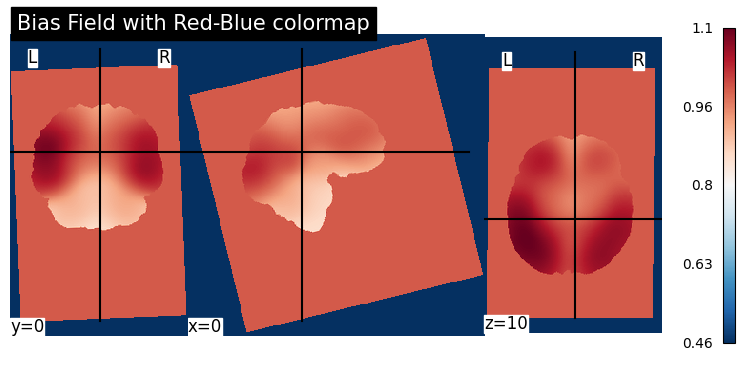

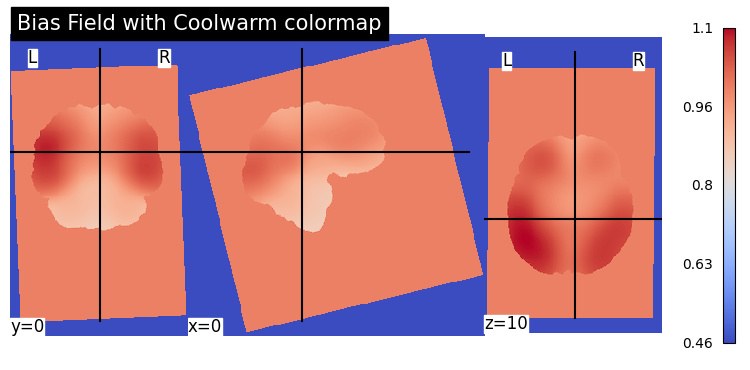

In [25]:
# Use a diverging colormap (red-blue) to show the bias variation
plotting.plot_anat(T1_bias,
                   title="Bias Field with Red-Blue colormap",
                   cut_coords=(0, 0, 10),
                   display_mode='ortho',
                   cmap='RdBu_r',  # Red-Blue colormap (reversed)
                   colorbar=True)

# Use the 'coolwarm' colormap
plotting.plot_anat(T1_bias,
                   title="Bias Field with Coolwarm colormap",
                   cut_coords=(0, 0, 10),
                   display_mode='ortho',
                   cmap='coolwarm',
                   colorbar=True)

/tmp/ipython-input-1196583908.py:12: UserWarning: kwargs['alpha']=0.7 detected in parameters.
Overriding with transparency=None.
To suppress this warning pass your 'alpha' value via the 'transparency' parameter.
  plotting.plot_stat_map(T1_bias,


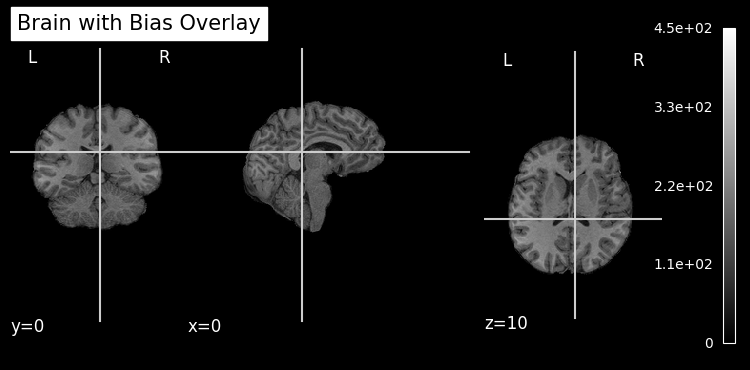

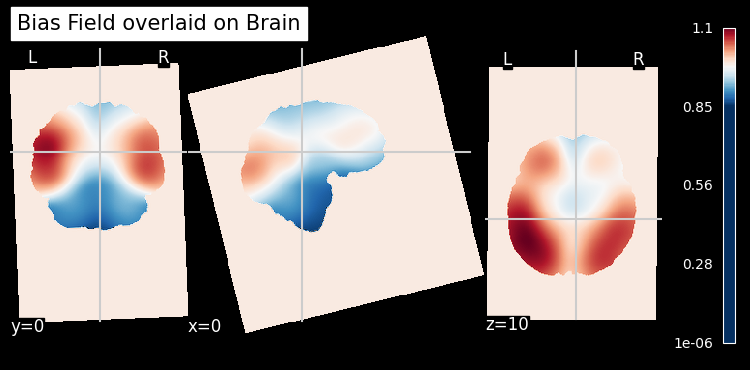

In [26]:
# Use the overlay the bias on the actual brain to see the effect better
T1_orig = '/content/data_MHEDAS_MI_P1/example_T1_brain.nii.gz'

# Plot brain with bias as overlay
plotting.plot_anat(T1_orig,
                   title="Brain with Bias Overlay",
                   cut_coords=(0, 0, 10),
                   display_mode='ortho',
                   cmap='gray')

# Then add the bias as a statistical map overlay
plotting.plot_stat_map(T1_bias,
                       bg_img=T1_orig,
                       title="Bias Field overlaid on Brain",
                       cut_coords=(0, 0, 10),
                       display_mode='ortho',
                       cmap='RdBu_r',
                       colorbar=True,
                       alpha=0.7)  # transparency

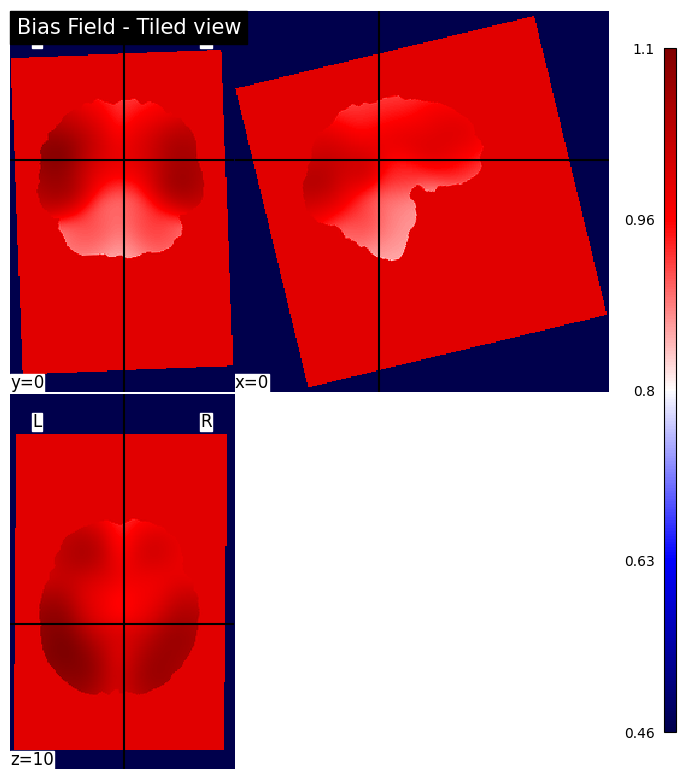

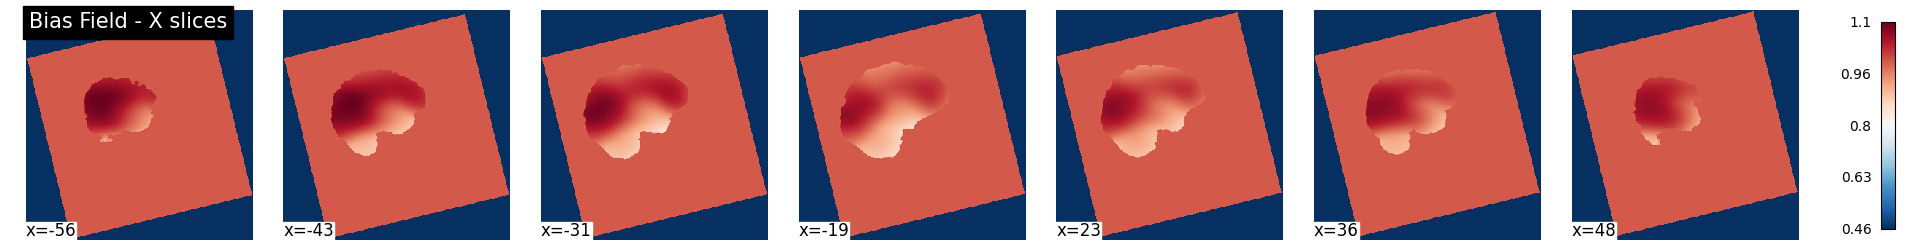

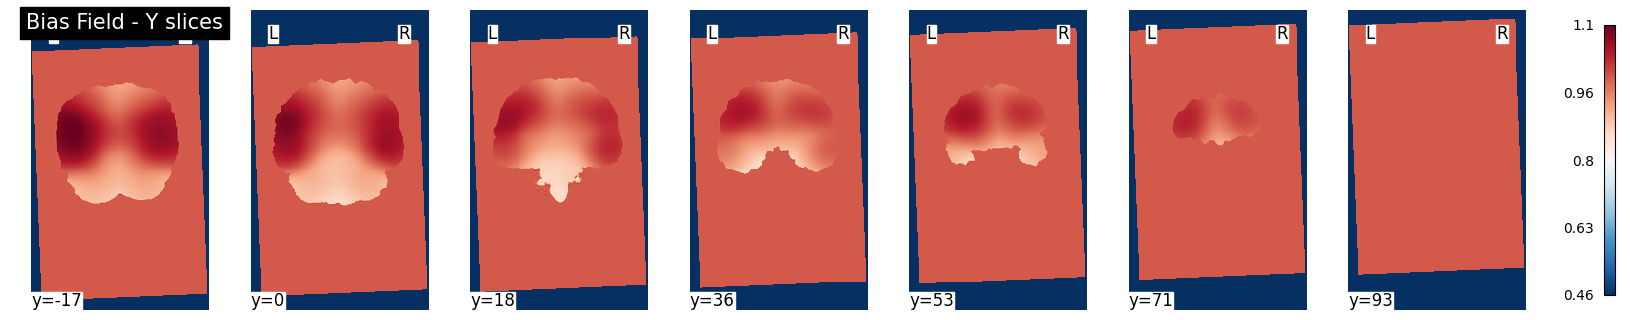

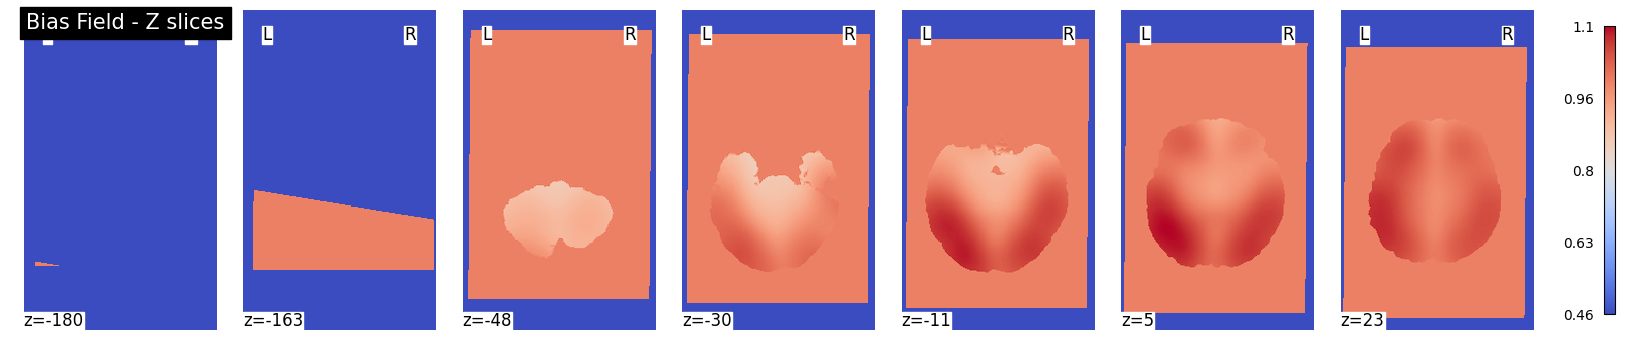

In [27]:
# Use 'tiled' mode for multiple views
plotting.plot_anat(T1_bias,
                   title="Bias Field - Tiled view",
                   cut_coords=cut_coords_options,
                   display_mode='tiled',
                   cmap='seismic',
                   colorbar=True)

# Use the mosaic with x, y, z directions separately
plotting.plot_anat(T1_bias,
                   title="Bias Field - X slices",
                   display_mode='x',
                   cmap='RdBu_r',
                   colorbar=True)

plotting.plot_anat(T1_bias,
                   title="Bias Field - Y slices",
                   display_mode='y',
                   cmap='RdBu_r',
                   colorbar=True)

# only z direction
plotting.plot_anat(T1_bias,
                   title="Bias Field - Z slices",
                   display_mode='z',
                   cmap='coolwarm',
                   colorbar=True)

The bias field image looks strange because it's not meant to be viewed like a regular brain image. We see some images like a brain.

Checking the academic material to understand how the bias works, we are seeing:

- The smooth intensity variation (the multiplicative factor that distorts the original image)
- The colors (purple/hot and yellow) represent how much the bias is affecting different regions
- It looks almost like a smooth gradient or "glow" rather than anatomical structures

**Exercise:** In your owns words, explain what is bias and how it affects images.

*Write your answer here*
## Final thoughts about Bias field

Bias field (also called intensity inhomogeneity) is a smooth, low-frequency intensity variation that occurs across MRI images due to imperfections in the magnetic field, such as spatial inhomogeneities in the main magnetic field or radiofrequency coils.

This artifact manifests as a gradual change in brightness across the image, making tissues of the same type appear with different intensities depending on their spatial location.

Unlike noise, which is random and additive, bias field acts as a multiplicative factor that distorts the true signal intensity.

This affects image analysis in several critical ways:
- it can cause automated segmentation algorithms to misclassify tissues, as they rely on intensity values to distinguish between different tissue types;
- it complicates image registration and comparison across different scans;
- it affects quantitative measurements of tissue properties.

Bias field correction is therefore essential preprocessing step to ensure that intensity values reflect true tissue characteristics rather than scanner artifacts, improving the accuracy and reliability of subsequent automated analysis methods.

##3. Brain extraction

A common preprocessing step in brain MRI is to extract the brain (separate the brain from skull, skin, neck,...)


In [ ]:
from nipype.interfaces.ants.segmentation import BrainExtraction
T1_img = 'example_T1w.nii.gz'
T1_brain_extract = 'example_T1_brain.nii.gz'
T1_img = nib.load(T1_img)
T1_img_brain_extract = nib.load(T1_brain_extract)

# plot
cut_coords = (10,10,10)
plotting.plot_anat(T1_img, title="T1_img", cut_coords=cut_coords, vmax=255)
plotting.plot_anat(T1_img_brain_extract, title="T1_img_brain_extract", cut_coords=cut_coords, vmax=255)


**Exercise:** Based on the previous images, what do the brain extraction tools do?


##4. Brain Segmentation
A common preprocessing step that separates the main brain tissues using the histogram.
There are many available tools to do this, for example FSL, FreeSurfer or SPM.

Here, we will explore the outputs of a basic tissue segmentation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# use imshow to plot the figures
# Plot first figure
T1_img = 'example_T1w.nii.gz'
T1_img = nib.load(T1_img)
T1_data = T1_img.get_fdata()
plt.imshow(T1_data[:, :, 160], vmax=500, origin="lower")
plt.title('T1 data before skull-stripping')

Now, we can compute the histogram of this image:

In [ ]:

# Compute the optimal bin size according to the data
bins = np.histogram_bin_edges(T1_data[T1_data!= 0], bins='auto')
# Plot the histogram
sns.histplot(T1_data[T1_data != 0], bins=bins)
plt.xlim([0, 255])

**Question:** What do you observe from the previous histogram?

**Exercise:** plot the image and the histogram after skull stripping (find it in your folder). Try also examining other slices and sections.

In [ ]:
# place your code here (image):


In [ ]:
# place your code here (histogram)


Now, we will examine the outputs of the segmentation together with the  histogram. Note that we have computed the segmentation before and we give the output to you:

In [ ]:
# NOTE: brain data is stored into 'T1_brain_data'

import itertools
T1_brain_img = 'example_T1w.nii.gz'
T1_brain_img = nib.load(T1_brain_img)
T1_brain_data = T1_img.get_fdata()
T1_seg_image = 'example_T1_brain_seg.nii.gz'
T1_seg_image = nib.load(T1_seg_image)
T1_seg_data = T1_seg_image.get_fdata()
labels = np.unique(T1_seg_data[T1_seg_data != 0]).astype('int')
palette = itertools.cycle(sns.color_palette("Set3"))
for label in labels:
    sns.histplot(T1_brain_data[T1_seg_data == label], bins=bins, color=next(palette), alpha=0.6)

**Exercise**: Use the histogram code given above to explore the differences of performing segmentation on images before/after bias correction.  

In [ ]:
# place your code here

Final remarks: A question of probability:

In [ ]:

GMprob_image = 'example_T1_brain_pve_1.nii.gz'
GMprob_image = nib.load(GMprob_image)
GM_probmap = GMprob_image.get_fdata()

plotting.plot_roi(roi_img=GMprob_image, bg_img=T1_img, alpha=0.2, cmap="jet", vmin=0.5, vmax=1);

**Exercise**: Try different options of the plotting.plot_roi function to improve the image above.

In [ ]:
# place your code here

***

